In [ ]:
## para instalar as dependencias no jupyter
## executar esta celular
! pip install -r ..requirements.txt

In [28]:
## bibliotecas necessarias
import librosa 
import matplotlib.pyplot as plt 
import numpy as np
import pickle as pkl
from datetime import datetime
from IPython.display import Audio # play audio, funciona apenas no jupyter
from auth_audio import AudioAuth
import pyaudio
%reload_ext auth_audio

In [29]:
MEDIA_PATH = '../media'
TRAIN_FILE_PATH = F'{MEDIA_PATH}/train'
TEST_FILE_PATH = F'{MEDIA_PATH}/test'
sr = 44100

In [30]:
aa = AudioAuth()

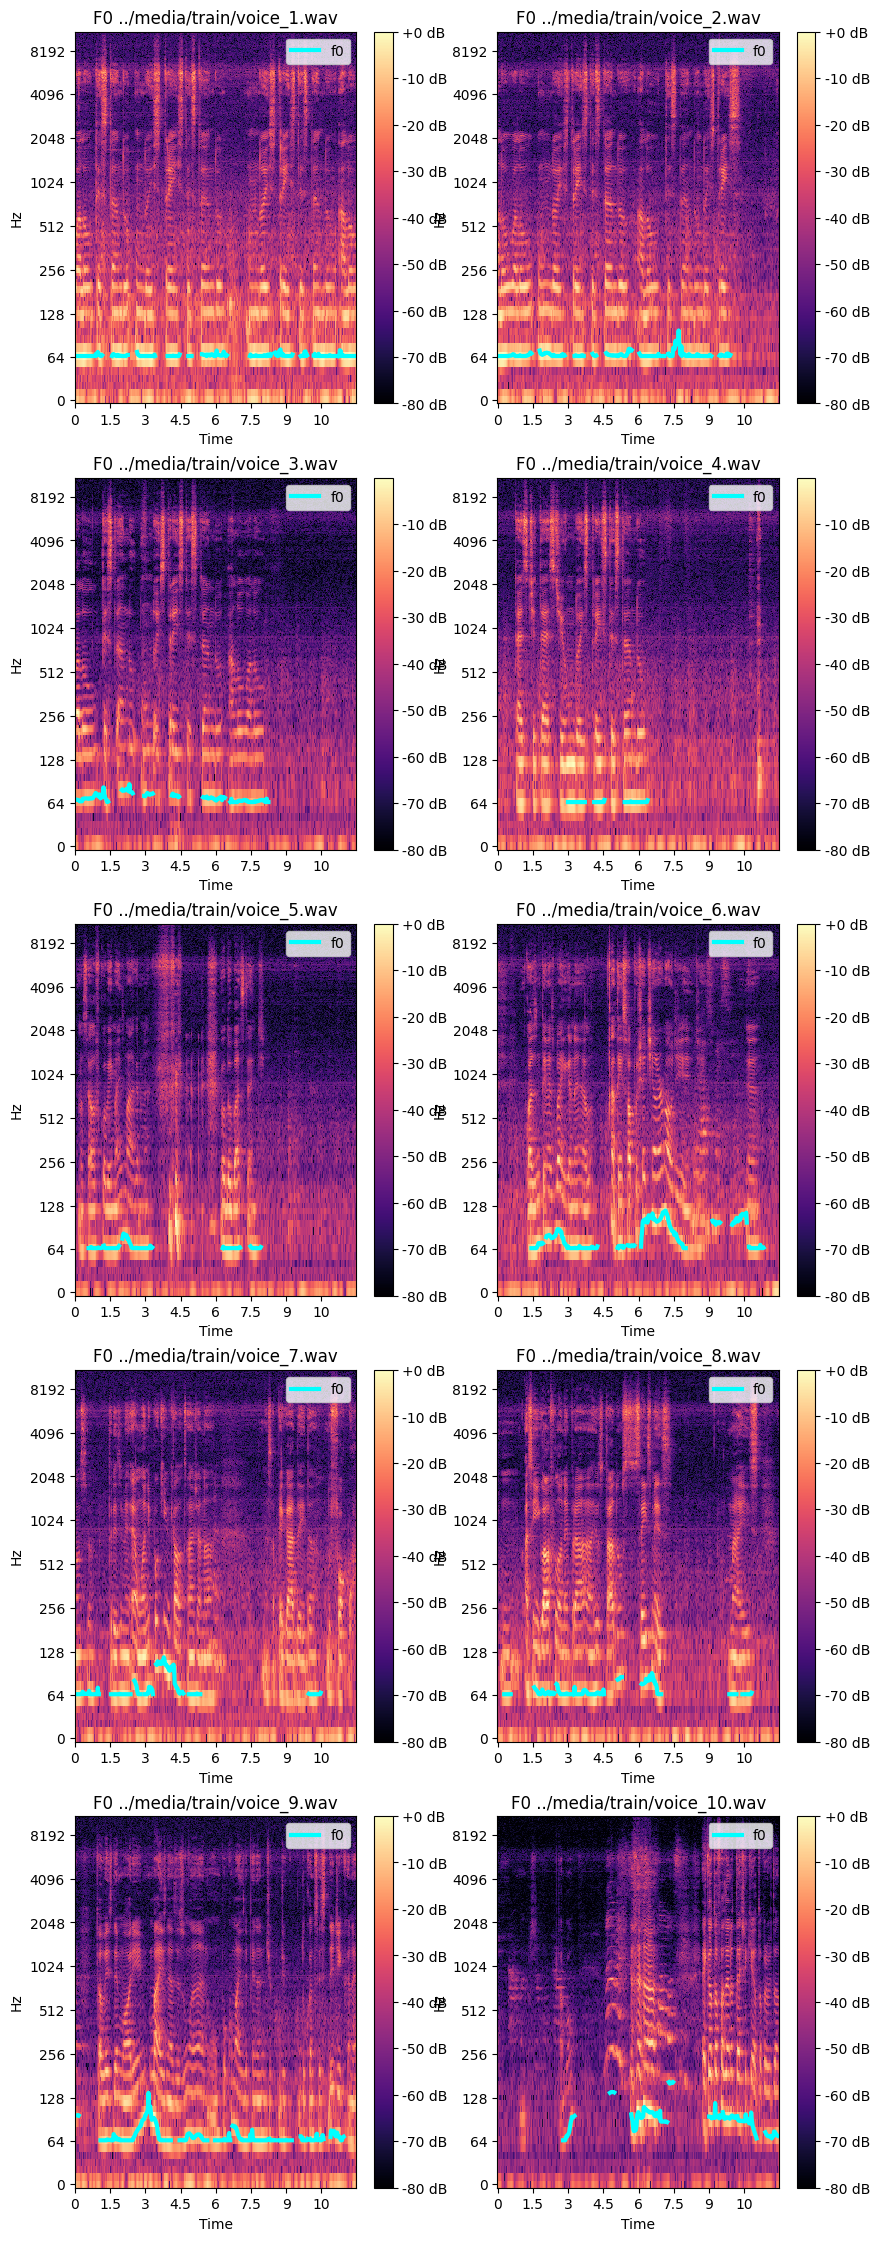

In [31]:
fig, axs = plt.subplots(5,2, figsize=(10,28))


for ax, i in zip(axs.flatten(), range(1,11)):
    filename = f'{TRAIN_FILE_PATH}/voice_{i}.wav'
    y, sr = librosa.load(filename, sr=sr)

    f0, voiced_flag, voiced_probs = librosa.pyin(y, # calc f0
                                        fmin=librosa.note_to_hz('C2'), 
                                        fmax=librosa.note_to_hz('E3'))

    times = librosa.times_like(f0)

    # plot do espectro ao longo do tempo e destaque na F0

    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
    ax.set(title=f'F0 {filename}')
    fig.colorbar(img, ax=ax, format="%+2.f dB")
    ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
    ax.legend(loc='upper right')
plt.show()

In [32]:
# array para tirar uma media da freq. f0 do usuário
# lendo os arquivos em sequencia
file_list = [f'{TRAIN_FILE_PATH}/voice_{i}.wav' for i in range(1,11)]
aa.fit(file_list, sr)

f0 stats: 76.34 14.49


In [33]:
aa.m0_arr

array([ 66.43515893,  67.11722245,  71.89413229,  69.03244641,
        70.92885981,  80.47007841,  75.33931672,  73.13494395,
        70.8407199 , 118.24287479,  66.43515893,  67.11722245,
        71.89413229,  69.03244641,  70.92885981,  80.47007841,
        75.33931672,  73.13494395,  70.8407199 , 118.24287479])

In [34]:
# Testando modelo proposto
for i in range(1,6):
    filename = f'{TEST_FILE_PATH}/voice_{i}.wav'
    print(filename)
    print("Usuario reconhecido:",aa.predict(filename, sr))


../media/test/voice_1.wav
Usuario reconhecido: (69.54237369637443, True)
../media/test/voice_2.wav
Usuario reconhecido: (69.66332454619845, True)
../media/test/voice_3.wav
Usuario reconhecido: (72.44174310758936, True)
../media/test/voice_4.wav
Usuario reconhecido: (975.2627963855906, False)
../media/test/voice_5.wav
Usuario reconhecido: (75.45520981393608, True)


In [35]:
filename = f'../media/production/voice.wav'
print(filename)
print("Usuario reconhecido:",aa.predict(filename, sr))


../media/production/voice.wav
Usuario reconhecido: (66.31401525445877, True)


In [36]:
user = 'rbaisso'
today_str = datetime.now().strftime("%Y%m%d")

with open(f'../model/{user}_model_{today_str}.pkl', 'wb') as file:
    pkl.dump(aa, file)